In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = 'bank-additional-full.csv'
df = pd.read_csv(file, sep = ';')


In [2]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [3]:
df.groupby('y').count()
# Number of success is very low compared to failures. 36548 = 0 and 4640 = 1
# columns have missing values of unknown or nonexistent values.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


In [4]:
#check for missing values 
print(df.info())
df.isnull().any().any()

#No values are missing. No steps were taken to fill missing values. There are however, 'unknown' 
#categories within variables which may need to be addressed later on. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

False

In [5]:
#job marital unknown

#df_unknown_job = df[df.job == 'unknown']
#print(df['job'].value_counts(dropna=False))
#print(df['marital'].value_counts(dropna=False))
#print(df['education'].value_counts(dropna=False))

#print(df_unknown_job)
df.shape

(41188, 21)

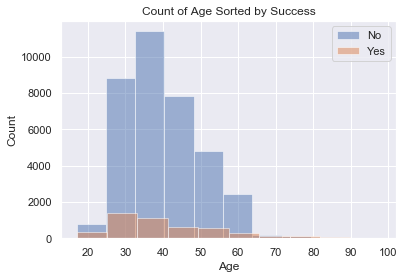

In [6]:
sns.set(style = 'darkgrid')
yes = df[df['y'] == 'yes']
no = df[df['y'] == 'no']
ax = plt. hist(x = 'age', alpha = 0.5, data = no)
ax = plt.hist(x = 'age', alpha = 0.5, data = yes)
ax = plt.title('Count of Age Sorted by Success')
ax = plt.legend(['No', 'Yes'])
ax = plt.xlabel('Age')
ax = plt.ylabel('Count')
plt.show()

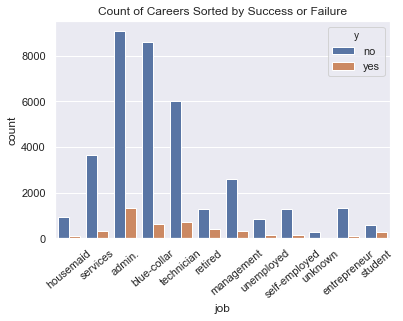

In [7]:
#early data analysis 
ax = sns.countplot(x = 'job', hue = 'y', data = df)
ax.set_title('Count of Careers Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

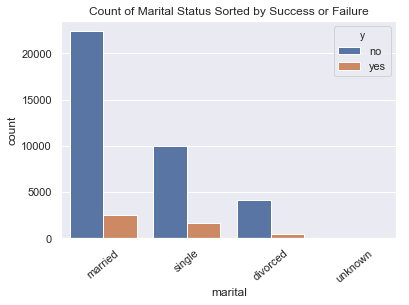

In [8]:
ax = sns.countplot(x = 'marital', hue = 'y', data = df)
ax.set_title('Count of Marital Status Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

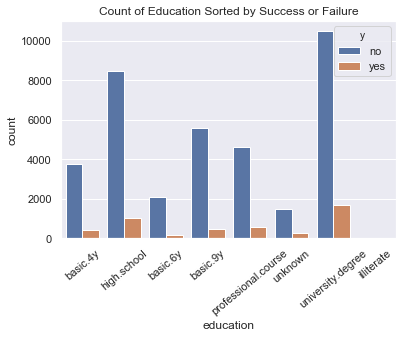

In [9]:
ax = sns.countplot(x = 'education', hue = 'y', data = df)
ax.set_title('Count of Education Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

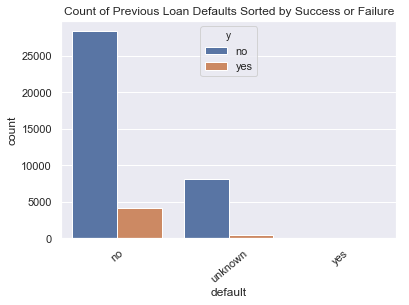

In [10]:
ax = sns.countplot(x = 'default', hue = 'y', data = df)
ax.set_title('Count of Previous Loan Defaults Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

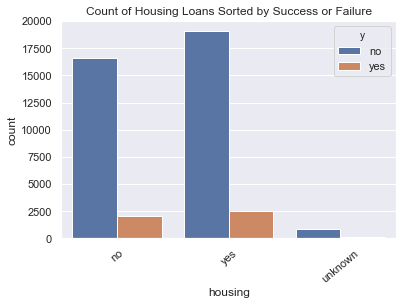

In [11]:
ax = sns.countplot(x = 'housing', hue = 'y', data = df)
ax.set_title('Count of Housing Loans Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

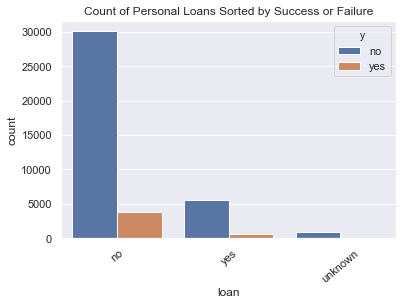

In [12]:
ax = sns.countplot(x = 'loan', hue = 'y', data = df)
ax.set_title('Count of Personal Loans Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

In [13]:
#perform correlation test

In [14]:
#apply machine learning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing


In [15]:
# Job and Marital status encoding. 
categorical_features = ['job', 'marital']
data1 = df

enc_job = preprocessing.OneHotEncoder()
job_enc = enc_job.fit_transform(df.job.values.reshape(-1,1)).toarray()
job_enc = pd.DataFrame(job_enc, columns = ['job_'+enc_job.categories_[0][int(i)]
                                        for i in range(job_enc.shape[1])])
data1 = pd.concat([df, job_enc], axis=1)

enc_mar = preprocessing.OneHotEncoder()
mar_enc = enc_mar.fit_transform(df.marital.values.reshape(-1,1)).toarray()
mar_enc = pd.DataFrame(mar_enc, columns = ['mar_'+ enc_mar.categories_[0][int(i)]
                                        for i in range(mar_enc.shape[1])])
data1 = pd.concat([data1,mar_enc], axis=1)

#print(data1)

In [16]:
#Encode housing/loan/default variables. Do they have housing loan/personal loan/or previous 
#credit default? no/0 yes/1 unknown/2

#print(df.loan.value_counts())

encoder = preprocessing.OrdinalEncoder(categories=[['unknown', 'yes', 'no']])
data1['housingenc'] = encoder.fit_transform(data1.housing.values.reshape(-1,1))
data1['defaultenc'] = encoder.fit_transform(data1.default.values.reshape(-1,1))
data1['loanenc'] = encoder.fit_transform(data1.loan.values.reshape(-1,1))

#Education Encoding
encoder = preprocessing.OrdinalEncoder(categories=[['unknown','illiterate','basic.4y', 'basic.6y',
                                                    'basic.9y', 'high.school','professional.course',
                                                    'university.degree']])
data1['educationenc'] = encoder.fit_transform(data1.education.values.reshape(-1,1))

#print(df.day_of_week.value_counts())
#Encode Month and day of the week variables
encoder = preprocessing.OrdinalEncoder(categories=[['jan', 'feb','mar','apr','may','jun','jul',
                                                   'aug','sep','oct','nov','dec']])
data1['monthenc'] = encoder.fit_transform(data1.month.values.reshape(-1,1))

encoder = preprocessing.OrdinalEncoder(categories=[['mon','tue','wed','thu','fri']])
data1['dayofweekenc'] = encoder.fit_transform(data1.day_of_week.values.reshape(-1,1))
#print(data1)

In [17]:
#Contact method Encoding cellular/0 or telephone/1

le = preprocessing.LabelEncoder()
contact_method= le.fit_transform(df.contact)
contact_method = pd.DataFrame(contact_method, columns = ['contact_method'])
data1['contact_method'] = contact_method

#previvous marketing campaign outcome, nonexistent/0, failure/1, success/2
encoder = preprocessing.OrdinalEncoder(categories=[['nonexistent', 'failure', 'success']])
data1['previouscamp'] = encoder.fit_transform(df.poutcome.values.reshape(-1,1))

#target variable encoding no/0 yes/1
yes = le.fit_transform(df.y)
data1['yes'] = pd.DataFrame(yes)

print(data1)
print(data1.columns)

       age            job   marital            education  default  housing  \
0       56      housemaid   married             basic.4y       no       no   
1       57       services   married          high.school  unknown       no   
2       37       services   married          high.school       no      yes   
3       40         admin.   married             basic.6y       no       no   
4       56       services   married          high.school       no       no   
5       45       services   married             basic.9y  unknown       no   
6       59         admin.   married  professional.course       no       no   
7       41    blue-collar   married              unknown  unknown       no   
8       24     technician    single  professional.course       no      yes   
9       25       services    single          high.school       no      yes   
10      41    blue-collar   married              unknown  unknown       no   
11      25       services    single          high.school       n

In [18]:
print(df.pdays.value_counts())

social_economic = df[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
print(social_economic['nr.employed'].value_counts())


999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64
5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64


In [19]:
#Remove all uneccesary object variables, split into dependent and independent variables.
data1.info()
data2 = data1.select_dtypes(exclude= 'object')
data2 = data2.drop(['yes','duration'], axis = 1)
target_var = data1['yes']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 46 columns):
age                  41188 non-null int64
job                  41188 non-null object
marital              41188 non-null object
education            41188 non-null object
default              41188 non-null object
housing              41188 non-null object
loan                 41188 non-null object
contact              41188 non-null object
month                41188 non-null object
day_of_week          41188 non-null object
duration             41188 non-null int64
campaign             41188 non-null int64
pdays                41188 non-null int64
previous             41188 non-null int64
poutcome             41188 non-null object
emp.var.rate         41188 non-null float64
cons.price.idx       41188 non-null float64
cons.conf.idx        41188 non-null float64
euribor3m            41188 non-null float64
nr.employed          41188 non-null float64
y                    41188 non-

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

X_train, X_test, y_train, y_test = train_test_split(data2, target_var, 
                                                    test_size = 0.3,
                                                   random_state = 42)
clf = RandomForestClassifier(n_estimators = 1000,
                            random_state = 42)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predicted)
print('Accuracy: %.3f' % accuracy)


Accuracy: 0.895


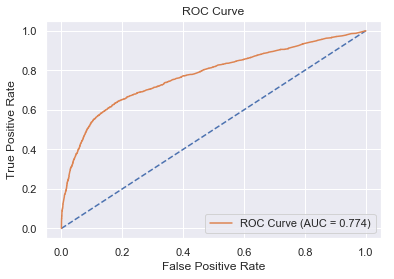

In [21]:
#calculate roc and auc 

#Predict probabilities keeping positive outcomes only
y_pred_proba = clf.predict_proba(X_test)[:,1]

#Calculate the AUC
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Calculate roc curve 
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test, y_pred_proba)

_ = plt.plot([0,1],[0,1], linestyle = '--')
_ = plt.plot(fpr_clf, tpr_clf, label = 'ROC Curve (AUC = %.3f)' 
             % auc)
_ = plt.title('ROC Curve')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.legend(loc = 'lower right')
_ = plt.show()



f1: 0.388 auc: 0.432 ap: 0.432


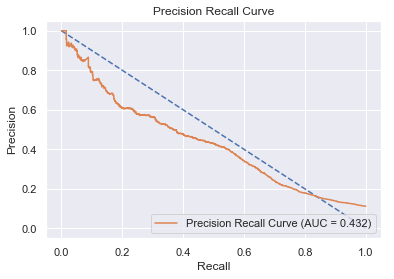

In [22]:
#precision recall curves
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)

#f1 score 
f1 = metrics.f1_score(y_test, y_predicted)
#auc of precision recall
PRauc = metrics.auc(recall, precision)
#average precision score
ap = metrics.average_precision_score(y_test, y_pred_proba)

print('f1: %.3f auc: %.3f ap: %.3f' % (f1, PRauc, ap))

_ = plt.plot([0,1],[1,0], linestyle = '--')
_ = plt.plot(recall, precision, label = 'Precision Recall Curve (AUC = %.3f)' 
             % PRauc)
_ = plt.title('Precision Recall Curve')
_ = plt.xlabel('Recall')
_ = plt.ylabel('Precision')
_ = plt.legend(loc = 'lower right')
_ = plt.show()

In [23]:
feature_importance = pd.Series(clf.feature_importances_, 
                               index = data2.columns).sort_values(ascending=False)
feature_importance

age                  0.171378
euribor3m            0.136905
campaign             0.082778
educationenc         0.066205
dayofweekenc         0.062394
nr.employed          0.055735
housingenc           0.041247
pdays                0.038479
previouscamp         0.033442
cons.conf.idx        0.029761
loanenc              0.028127
emp.var.rate         0.024300
cons.price.idx       0.024172
monthenc             0.019391
previous             0.018239
job_admin.           0.017165
contact_method       0.015977
mar_married          0.015824
defaultenc           0.014217
mar_single           0.014131
job_technician       0.014116
job_blue-collar      0.011245
mar_divorced         0.010252
job_management       0.009214
job_services         0.009008
job_retired          0.006435
job_self-employed    0.006184
job_student          0.005598
job_unemployed       0.005433
job_entrepreneur     0.005274
job_housemaid        0.004643
job_unknown          0.002127
mar_unknown          0.000602
dtype: flo